In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import tensorflow as tf


In [138]:
df=pd.read_csv("/content/MSFT (2).csv")

In [139]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-19,51.480000,51.680000,50.060001,50.560001,44.930946,43564500
1,2016-01-20,49.980000,51.380001,49.099998,50.790001,45.135334,63273000
2,2016-01-21,51.000000,51.580002,50.299999,50.480000,44.859848,40191200
3,2016-01-22,51.410000,52.330002,51.259998,52.290001,46.468334,37555800
4,2016-01-25,51.939999,52.650002,51.650002,51.790001,46.024002,34707700


In [140]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2008,2024-01-10,376.369995,384.170013,376.320007,382.769989,382.769989,25514200
2009,2024-01-11,386.000000,390.679993,380.380005,384.630005,384.630005,27850800
2010,2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700
2011,2024-01-16,393.660004,394.029999,387.619995,390.269989,390.269989,27202300
2012,2024-01-17,387.980011,390.109985,384.809998,389.470001,389.470001,22214400


In [141]:
df['Date']=pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)

In [142]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-19,51.480000,51.680000,50.060001,50.560001,44.930946,43564500
2016-01-20,49.980000,51.380001,49.099998,50.790001,45.135334,63273000
2016-01-21,51.000000,51.580002,50.299999,50.480000,44.859848,40191200
2016-01-22,51.410000,52.330002,51.259998,52.290001,46.468334,37555800
2016-01-25,51.939999,52.650002,51.650002,51.790001,46.024002,34707700


In [143]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03
mean,177.880492,179.660606,176.045067,177.944257,173.078018,2.889948e+07
std,97.843763,98.861291,96.811061,97.888110,98.836030,1.270520e+07
min,48.680000,49.150002,48.040001,48.430000,43.650276,7.425600e+06
25%,88.510002,89.779999,87.510002,88.220001,82.347939,2.098790e+07
50%,155.449997,157.770004,154.179993,157.410004,151.686264,2.572550e+07
75%,259.899994,263.190002,257.130005,260.649994,256.391602,3.306480e+07
max,393.660004,394.029999,387.619995,390.269989,390.269989,1.335030e+08


In [144]:
#sns.heatmap(data=df.corr(), annot=True)
#df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2016-01-19 to 2024-01-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2013 non-null   float64
 1   High       2013 non-null   float64
 2   Low        2013 non-null   float64
 3   Close      2013 non-null   float64
 4   Adj Close  2013 non-null   float64
 5   Volume     2013 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.1 KB


In [34]:
#lstm

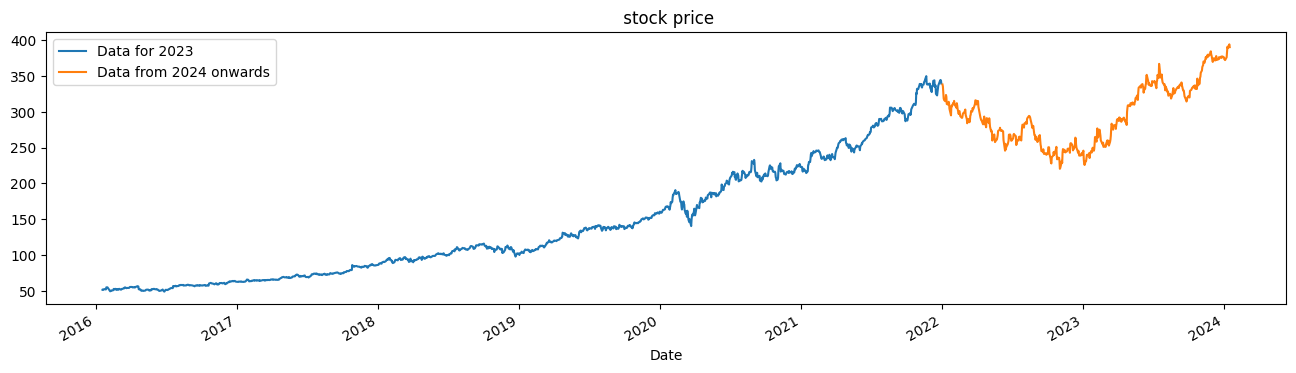

In [165]:
df["High"][df.index.year <= 2021].plot(figsize=(16, 4), legend=True)

# Plotting all datapoints from the year 2024 onwards
df["High"][df.index.year >= 2022].plot(figsize=(16, 4), legend=True)

plt.legend(['Data for 2023', 'Data from 2024 onwards'])
plt.title(' stock price')
plt.show()


In [167]:
training_set = df[:'2021'].iloc[:,1:2].values
test_set = df['2022':].iloc[:,1:2].values

In [169]:
len(training_set)

1501

In [168]:
len(test_set)

512

In [113]:
#training_set

In [170]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [173]:
X_train = []
y_train = []
for i in range(60,1501):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [174]:
print(X_train.shape)

(1441, 60)


In [175]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [176]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
46/46 [==============================] - 13s 101ms/step - loss: 0.0147
Epoch 2/50
46/46 [==============================] - 5s 98ms/step - loss: 0.0063
Epoch 3/50
46/46 [==============================] - 6s 127ms/step - loss: 0.0058
Epoch 4/50
46/46 [==============================] - 5s 102ms/step - loss: 0.0043
Epoch 5/50
46/46 [==============================] - 5s 107ms/step - loss: 0.0047
Epoch 6/50
46/46 [==============================] - 5s 116ms/step - loss: 0.0033
Epoch 7/50
46/46 [==============================] - 5s 98ms/step - loss: 0.0043
Epoch 8/50
46/46 [==============================] - 6s 128ms/step - loss: 0.0031
Epoch 9/50
46/46 [==============================] - 5s 97ms/step - loss: 0.0029
Epoch 10/50
46/46 [==============================] - 5s 99ms/step - loss: 0.0030
Epoch 11/50
46/46 [==============================] - 7s 150ms/step - loss: 0.0028
Epoch 12/50
46/46 [==============================] - 5s 98ms/step - loss: 0.0032
Epoch 13/50
46/46 [==========

In [183]:
dataset_total = pd.concat((df["High"][df.index.year <= 2021],df["High"][df.index.year >= 2022]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [184]:
inputs.shape

(572, 1)

In [187]:
X_test = []
for i in range(60,572):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

16/16 [==============================] - 1s 51ms/step


In [188]:
X_test.shape

(512, 60, 1)

In [189]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('Microsoft Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

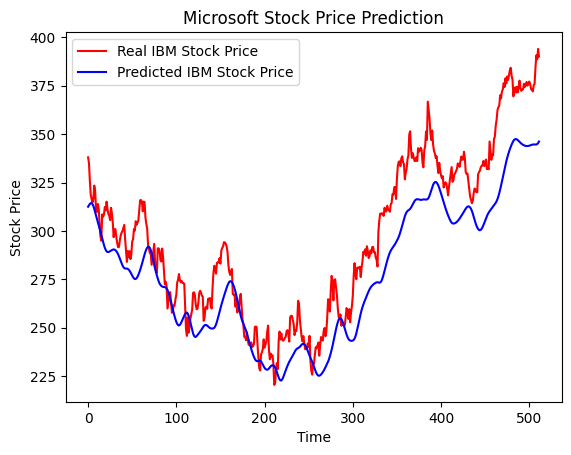

In [190]:
plot_predictions(test_set,predicted_stock_price)